In [27]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import requests
import time
import json
import keras
import warnings
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from bs4 import BeautifulSoup

# Display preference
warnings.filterwarnings('ignore')

In [11]:
def scroll(driver, option, timeout):
    
    if option == 1:
    
        # Get scroll height
        last_height = driver.execute_script("return document.body.scrollHeight")

        while True:
    
            # Scroll down to bottom
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

            # Wait
            time.sleep(timeout)

            # Calculate new scroll height and compare with last scroll height
            new_height = driver.execute_script("return document.body.scrollHeight")
        
            if new_height == last_height:
            
                break
        
            last_height = new_height
    else:
        
        # Used to scroll webpage and scrape occupation names
        for i in range(9):
            
            # Get element
            load_more_button = driver.find_element_by_xpath('/html/body/main/div/div[1]/article/div[5]/div/div/section/div/button/div')
            driver.execute_script("arguments[0].click();", load_more_button)
            
            # Wait
            time.sleep(timeout)        

In [12]:
# Set options
options = Options()
options.set_preference('permissions.default.image', 2)
options.set_preference('dom.ipc.plugins.enabled.libflashplayer.so', False)

def all_links(url, scroll_option=0, action=0):
    
    # Setup driver
    driver = webdriver.Firefox(options=options, executable_path='D:/Users/bengriffith/Desktop/geckodriver.exe')

    # Wait before throwing an exception
    driver.implicitly_wait(30)

    # Open the page
    driver.get(url)
    
    # Start scrolling
    scroll(driver, scroll_option, 10)
    
    # Beautiful Soup parses page_source
    soup = BeautifulSoup(driver.page_source, 'lxml')
    
    # Close the driver
    driver.close()

    if action == 1:
    
        # Empty dictionary to store m from page source
        get_m = {}
    
        # Counter for get_m dictionary
        get_m_counter = 0

        # Looping through all the a elements in the page source
        for link in soup.find_all('a', {'class': 'iusc'}):
    
            # Add values to dictionary
            get_m[get_m_counter] = link.get('m')
        
            # Increment counter
            get_m_counter += 1
        
        # Convert from string to dictionary
        for key, value in get_m.items():
            get_m[key] = json.loads(value)
        
        # Empty list to store image links
        links = []
    
        # Loop through get_m dictionary and add image links to links list
        for value in get_m.values():
            links.append(value['murl'])
        
        return links
    else:
        return soup

In [13]:
# List of image types / categories
image_types = ['celebrity', 'famous', 'actor', 'actress', 'soccer', 'baseball', 'basketball', 'football', 'male', 'female', 'woman', 'man', 'guy', 'girl']

In [14]:
# Best ranked jobs url
occupation_url = 'https://money.usnews.com/careers/best-jobs/rankings/the-100-best-jobs'

# Beautiful Soup object
soup_occupation = all_links(occupation_url)
    
# Get a tag
a_tag = soup_occupation.select('.card-body-container > div > h2 > a')

# Add occupation to image type list
image_types += [occupation.get_text().lower() for occupation in a_tag]

In [16]:
len(image_types)

114

In [17]:
# List for image links
image_links = []

# Get image links for each image type
for image_type in image_types:
    
    # Update url
    url = 'https://www.bing.com/images/search?q=' + image_type + '&qs=n&form=QBIR&qft=%20filterui%3Alicense-L2_L3_L4_L5_L6_L7%20filterui%3Aface-face&sp=-1&pq=' + image_type + '&sc=8-9&sk=&cvid=8C2D8EC9A35A4948980A61669549C180'
    
    # Add image links
    image_links += all_links(url, 1, 1)

In [19]:
len(image_links)

16075

In [49]:
for image_link in image_links[:10]:
    print(image_link)

https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/A._Schwarzenegger.jpg/220px-A._Schwarzenegger.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Wolfgang_Puck_2012.jpg/1200px-Wolfgang_Puck_2012.jpg
http://farm3.static.flickr.com/2727/4180076234_1aef8e0094.jpg
http://cf2.foodista.com/sites/default/files/styles/featured/public/field/image/Capture_20.JPG
http://2.bp.blogspot.com/-LRkCCqwYrOM/TgMCzqLihrI/AAAAAAAAMPI/TU27Aiy68Hk/s1600/Pictures_of_short_bob_hairstyle_asian_short_bob_hairstyle.jpg
http://www.toulouseandtonic.com/wp-content/uploads/2012/01/babynamegame-1024x695.jpg
http://3.bp.blogspot.com/-Ziv7C8b9tvs/T5sbxTCxTAI/AAAAAAAAAZQ/dV4rSL6xzck/s1600/Alicia+Keys+Hairstyles+2012+-+Most+Popular+Celebrity+Hairstyles.jpg
https://3.bp.blogspot.com/_M9roea07aEo/TRnTFTe65gI/AAAAAAAAAe0/rjh0M5XmN8I/s1600/kate-hudson.jpg
http://www.pileofbabies.com/wp-content/uploads/2013/04/SAMUEL-L-JACKSON.jpg
https://2.bp.blogspot.com/_M9roea07aEo/TRnTEjuNE3I/AAAAAAAAAew/MOfr6aLuSi0/s1

In [38]:
# Header to accompany get request
headers = {'user-agent': 'scraper - school project (bengriffith@outlook.com)'}

# Counter to be used in image file name
image_counter = 0

# Write images to disk
for image_link in image_links[:51]:
    with open('images/face_' + str(image_counter) + '.png', 'wb') as f:
        response = requests.get(image_link, headers=headers)
        f.write(response.content)
    image_counter += 1

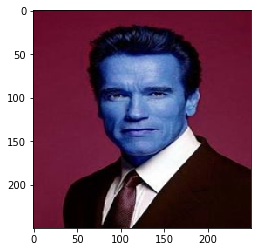

In [57]:
image_data = []

for filename in os.listdir('images/')[1:2]:
    image = cv2.imread('images/' + filename)
    image = cv2.resize(image, (250, 250))
    plt.imshow(image)
#    image_data.append(image)